## Notebook setup

The initial step includes mounting a drive for Colab and installing the dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -r "/content/drive/MyDrive/ml_projects/tdt12_nlp_creative/requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.2 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 708 kB 32.8 MB/s 
     |████████████████████████████████| 572 kB 46.0 MB/s 
     |████████████████████████████████| 529 kB 58.6 MB/s 
     |████████████████████████████████| 182 kB 64.7 MB/s 
     |████████████████████████████████| 7.6 MB 53.3 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
  Created wheel for aitextgen: filename=aitextgen-0.6.0-py3-none-any.whl size=576010 sha256=ce855553c15bf02d2b9de1b9d0a667a4cfb401a5e86b44c9c4a5933a9001e228
  Stored in directory: /root/.cache/pip/wheels/eb/77/2a/993dcd2bf690ff75db487709aa0f770f15ea57a7f8ed088524
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=b65b9dee3602f4fff5fc0d15d465f35aa7ca9d6b493281445cd906ba13d2b614
  Stored in directory: /roo

## Python Imports

In [ ]:
# File/string operations
DATA = "/content/drive/MyDrive/ml_projects/tdt12_nlp_creative"
import os
import shutil
import demoji
import string
import regex as re
# Data operations
import numpy as np
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Tokenized dataset
from aitextgen.TokenDataset import TokenDataset

## Dataset generation


### Read in data

In [ ]:
df = pd.read_csv(f"{DATA}/dataset/merged_dataset_sentiment.csv", delimiter="█", engine="python")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[:, ~df.columns.str.contains('vader')]
df = df.loc[:, ~df.columns.str.contains('roberta')]
df.head()

,rating,text
0,6,This franchise has obviously become a parody. ...
1,4,Assassin John Wick is referred to as Baba Yaga...
2,7,"In the immediate lineage of the second opus, t..."
3,4,"John Wick, having killed someone within the sa..."
4,5,"It's not that I am not an action fan, one star..."


### Plot data

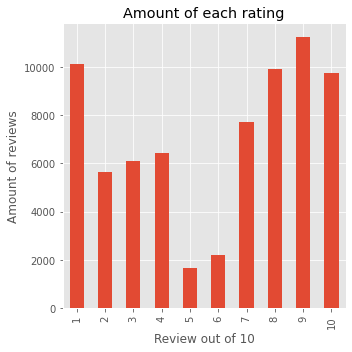

In [ ]:
rating_val_count = df["rating"].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlabel("Review out of 10")
ax.set_ylabel("Amount of reviews")
rating_val_count.plot(kind="bar",
               title="Amount of each rating",
               figsize=(5,5),
               ax=ax)
plt.tight_layout()
plt.show()

### Clean text

In [ ]:
example = "My name is [Martin]\.. \nI want to show you how   one could 'clean' text, while keeping the correct punctuation!\n\t How so? Well I am going to show you!!!! \nStay tuned for more 😎 <i><i/><br/>"
print(example)

My name is [Martin]\.. 
I want to show you how   one could 'clean' text, while keeping the correct punctuation!
	 How so? Well I am going to show you!!!! 
Stay tuned for more 😎 <i><i/><br/>


In [ ]:
unnecessary_punctuation = "[]\\_{}|~"
html_tags_regex = re.compile('<.*?>')

def text_cleaner(raw_text):
  cleaned_text = re.sub(html_tags_regex, '', raw_text) # Remove html tags
  cleaned_text = demoji.replace(cleaned_text) # Remove emojies
  cleaned_text = cleaned_text.translate(str.maketrans('', '', unnecessary_punctuation)) # Remove unnecessary punctuation
  cleaned_text = re.sub(r'[\!\?\.\,]+(?=[\!\?\.\,])', '', cleaned_text) # Remove excessive repeated punctuation
  cleaned_text = " ".join(cleaned_text.split()) # Remove whitespace, newline, tab etc.
  return cleaned_text

print(text_cleaner(example))

My name is Martin. I want to show you how one could 'clean' text, while keeping the correct punctuation! How so? Well I am going to show you! Stay tuned for more


### Create prompts

In [ ]:
small_df = df.head(1)
small_df["prompt"] = small_df.apply(lambda x: (str(x["rating"]) + "<|rating|>" + text_cleaner(str(x["text"]))), axis=1)
small_df.loc[0]["prompt"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'6<|rating|>This franchise has obviously become a parody. It seems that a very high number of the World\'s population serve the High Table. They\'re everywhere, behind every corner, but they cannot kill one single man, even if they stab, shoot, throw him from the hotel roof or hit him with a car at full speed. And the Head of this "powerful organization" lives among camels in an African desert . There are some entertaining moments, however the numerous fighting scenes become dull after a while.'

In [ ]:
df["prompt"] = df.apply(lambda x: (str(x["rating"]) + "<|rating|>" + text_cleaner(str(x["text"]))), axis=1)

In [ ]:
df.loc[21000]["prompt"]

'2<|rating|>So, I\'m wondering while watching this film, did the producers of this movie get to save money on Sandra Bullock\'s wardrobe by dragging out her "before" clothes from Miss Congeniality? Did Ms. Bullock also get to sleepwalk through the role by channeling the "before" Gracie Hart? As many reviewers have noted before, the film is very formulaic. Add to that the deja vu viewer experiences with the character of Cassie Maywether as a somewhat darker Gracie Hart with more back story and it rapidly become a snooze fest.The two bad boy serial killers have been done before (and better) in other films. As has the "good guy partner trying to protect his partner despite the evidence" character been seen before. In fact none of the characters in the film ever get beyond two dimensions or try to be anything but trite stereotypes.One last peeve - using the term serial killer is false advertising. Murdering one person - even if it\'s a premeditated murder - does not make you a serial kille

In [ ]:
df["prompt"]

0        6<|rating|>This franchise has obviously become...
1        4<|rating|>Assassin John Wick is referred to a...
2        7<|rating|>In the immediate lineage of the sec...
3        4<|rating|>John Wick, having killed someone wi...
4        5<|rating|>It's not that I am not an action fa...
                               ...                        
70767    8<|rating|>I was extraordinarily impressed by ...
70768    10<|rating|>Although I'm not a golf fan, I att...
70769    8<|rating|>From the start of "The Edge Of Love...
70770    10<|rating|>This movie, with all its complexit...
70771    7<|rating|>I've seen this story before but my ...
Name: prompt, Length: 70772, dtype: object

In [ ]:
df["prompt"].shape

(70772,)

### Save to file

In [ ]:
df.to_csv(f"{DATA}/dataset/processed_creative_prompts.txt", columns=["prompt"], header=None, index=None, sep=' ')

## Create TokenDataset

In [ ]:
data = TokenDataset(f"{DATA}/dataset/processed_creative_prompts.txt", line_by_line=True)
data.save()

  0%|          | 0/70772 [00:00<?, ?it/s]

INFO:aitextgen.TokenDataset:Encoding 70,772 sets of tokens from /content/drive/MyDrive/ml_projects/tdt12_nlp_creative/dataset/processed_creative_prompts.txt.
INFO:aitextgen.TokenDataset:Caching and compressing dataset to dataset_cache.tar.gz


In [ ]:
file_name = "dataset_cache.tar.gz"
shutil.copy(f"{file_name}", f"{DATA}/dataset/{file_name}")

'/content/drive/MyDrive/ml_projects/tdt12_nlp_creative/dataset/dataset_cache.tar.gz'